# Intro

### We have done a detailed analysis of this data.. You can see it from here : https://www.kaggle.com/code/zeadomar/preliminary-eda-of-prosper-loan
### Or from here : 


### Here we will care more about data cleaning , preprocessing , feature selection and modeling

# Importing & Get data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv("prosperLoanData.csv")
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [30]:
df.shape

(113937, 81)

# Data Cleaning 

In [31]:
df.drop(columns=["ListingKey","ListingNumber","GroupKey","LoanKey","LoanNumber","MemberKey","DateCreditPulled"],inplace= True )

In [32]:
lst = df.isnull().sum()
for i in range(len(lst)) :
    if lst[i] != 0 :
        x= lst[i]
        col = df.columns[i]
        y= (x/df.shape[0])*100
        print("col num : " +str(i) + " /  " + col + " / " + str(x) + " nulls /"+ str(round(y,2)) +" %")

col num : 1 /  CreditGrade / 84984 nulls /74.59 %
col num : 4 /  ClosedDate / 58848 nulls /51.65 %
col num : 5 /  BorrowerAPR / 25 nulls /0.02 %
col num : 8 /  EstimatedEffectiveYield / 29084 nulls /25.53 %
col num : 9 /  EstimatedLoss / 29084 nulls /25.53 %
col num : 10 /  EstimatedReturn / 29084 nulls /25.53 %
col num : 11 /  ProsperRating (numeric) / 29084 nulls /25.53 %
col num : 12 /  ProsperRating (Alpha) / 29084 nulls /25.53 %
col num : 13 /  ProsperScore / 29084 nulls /25.53 %
col num : 15 /  BorrowerState / 5515 nulls /4.84 %
col num : 16 /  Occupation / 3588 nulls /3.15 %
col num : 17 /  EmploymentStatus / 2255 nulls /1.98 %
col num : 18 /  EmploymentStatusDuration / 7625 nulls /6.69 %
col num : 21 /  CreditScoreRangeLower / 591 nulls /0.52 %
col num : 22 /  CreditScoreRangeUpper / 591 nulls /0.52 %
col num : 23 /  FirstRecordedCreditLine / 697 nulls /0.61 %
col num : 24 /  CurrentCreditLines / 7604 nulls /6.67 %
col num : 25 /  OpenCreditLines / 7604 nulls /6.67 %
col num : 

In [33]:
df.drop(columns=["CreditGrade","TotalProsperLoans","TotalProsperPaymentsBilled",
                 "ProsperPaymentsLessThanOneMonthLate","ProsperPaymentsOneMonthPlusLate","ProsperPrincipalBorrowed",
                "ProsperPrincipalOutstanding","ScorexChangeAtTimeOfListing","LoanFirstDefaultedCycleNumber","OnTimeProsperPayments",
                "ClosedDate"],inplace= True )

In [34]:
df.dropna(subset=["EstimatedEffectiveYield","EstimatedLoss","EstimatedReturn","ProsperRating (numeric)",
"ProsperRating (Alpha)","ProsperScore"],inplace = True)

In [35]:
lst = df.isnull().sum()
for i in range(len(lst)) :
    if lst[i] != 0 :
        x= lst[i]
        col = df.columns[i]
        y= (x/df.shape[0])*100
        print("col num : " +str(i) + " /  " + col + " / " + str(x) + " nulls /"+ str(round(y,2)) +" %")

col num : 14 /  Occupation / 1333 nulls /1.57 %
col num : 16 /  EmploymentStatusDuration / 19 nulls /0.02 %
col num : 40 /  DebtToIncomeRatio / 7296 nulls /8.6 %


In [36]:
df["DebtToIncomeRatio"].fillna(df["DebtToIncomeRatio"].mean,inplace = True)

In [37]:
df.dropna(inplace = True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83507 entries, 1 to 113936
Data columns (total 63 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ListingCreationDate                 83507 non-null  object 
 1   Term                                83507 non-null  int64  
 2   LoanStatus                          83507 non-null  object 
 3   BorrowerAPR                         83507 non-null  float64
 4   BorrowerRate                        83507 non-null  float64
 5   LenderYield                         83507 non-null  float64
 6   EstimatedEffectiveYield             83507 non-null  float64
 7   EstimatedLoss                       83507 non-null  float64
 8   EstimatedReturn                     83507 non-null  float64
 9   ProsperRating (numeric)             83507 non-null  float64
 10  ProsperRating (Alpha)               83507 non-null  object 
 11  ProsperScore                        8350

In [39]:
df["ListingCreationDate"] = df["ListingCreationDate"].str.extract(r"^(\w+)")
df["FirstRecordedCreditLine"] = df["FirstRecordedCreditLine"].str.extract(r"^(\w+)")
df["LoanOriginationDate"] = df["LoanOriginationDate"].str.extract(r"^(\w+)")

In [53]:
df.reset_index(inplace =True)

In [54]:
df.drop(columns="index",inplace = True)

# Handiling Outlires

In [55]:
"""
function which take The original data & List of columns to work on.
We have used IQR to finish it
"""
def handling_outliers(orignal_df,lst_of_columns) :
    for i in lst_of_columns:
        q1 = orignal_df[i].quantile(0.25)
        q3 = orignal_df[i].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr)
        for col in range(20,orignal_df.shape[0]):
            if orignal_df[i][col] < lower_bound :
                orignal_df[i][col]  = lower_bound
            elif orignal_df[i][col] > upper_bound :
                orignal_df[i][col]  = upper_bound
            else:
                continue 
    print("handling is done")
    
"""
function returnd list has just names of the continus featurs 
"""
    
def get_continus_list(df_):
    obj = df_.select_dtypes('object')
    lst = list(df_.columns)
    obj_lst = list(obj.columns)
    for i in obj_lst :
        lst.remove(i)
    return lst              

In [56]:
handling_outliers(df,get_continus_list(df)) 
print("All is Done")

<ipython-input-55-efbfcc6bac33>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orignal_df[i][col]  = lower_bound
<ipython-input-55-efbfcc6bac33>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orignal_df[i][col]  = upper_bound


handling is done
All is Done


# Feature Selection

In [61]:
def target_handling(row): 
    if row == 'Completed':
        return 1
    else:
        return 0

df['Status'] = df['LoanStatus'].apply(target_handling)
df.drop('LoanStatus',axis=1,inplace=True)

In [62]:
df['Status'].value_counts()

0    63863
1    19644
Name: Status, dtype: int64

In [80]:
obj = df.select_dtypes('object')
obj.nunique()


Series([], dtype: float64)

In [78]:
df.drop(columns =["DebtToIncomeRatio","IncomeRange","LoanOriginationDate"],inplace =True)

In [81]:
le = LabelEncoder()
les = {}
for col in obj.columns:
    les[col] = LabelEncoder()
    df[col]  = les[col].fit_transform(df[col])

In [84]:
corrlation = df.corrwith(df['Status']).sort_values(ascending = False)
sel_col = corrlation[(corrlation > 0.2) | (corrlation < -0.2)]
sel_col.drop('Status',inplace=True)
sel_col

LP_CustomerPrincipalPayments    0.620480
LoanMonthsSinceOrigination      0.581975
LP_CustomerPayments             0.503986
LoanOriginalAmount             -0.237274
Term                           -0.253068
ListingCreationDate            -0.562995
dtype: float64

# Preprocessing 

In [86]:
X = df[sel_col.index]
y= df['Status']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [104]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Modeling


In [91]:
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

In [92]:
parameters = dict(criterion=criterion,max_depth=max_depth)
parameters

{'criterion': ['gini', 'entropy'], 'max_depth': [2, 4, 6, 8, 10, 12]}

In [105]:
dt_cl = tree.DecisionTreeClassifier()
clf_GS = GridSearchCV(dt_cl, parameters)
clf_GS.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12]})

In [94]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['max_depth'])

Best Criterion: gini
Best max_depth: 10


In [106]:
dt_cl = tree.DecisionTreeClassifier(criterion="gini",max_depth =10,min_samples_split=2,min_samples_leaf=1)


In [107]:
dt_cl.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

# Model Evaluation

In [108]:
print("Train Score : "+str(round((dt_cl.score(X_train,y_train))*100,3) )+"%")
print("Test Score : "+str(round((dt_cl.score(X_test,y_test))*100,3)) +"%")

Train Score : 98.926%
Test Score : 98.614%


(<Figure size 864x360 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

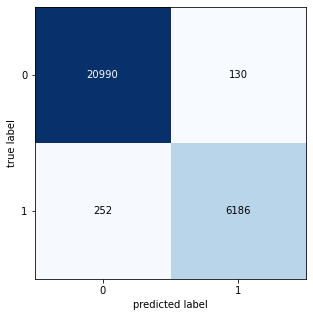

In [109]:
plot_confusion_matrix(confusion_matrix(y_test,dt_cl.predict(X_test)),figsize=(12,5))

In [110]:
print(classification_report(y_test,dt_cl.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     21120
           1       0.98      0.96      0.97      6438

    accuracy                           0.99     27558
   macro avg       0.98      0.98      0.98     27558
weighted avg       0.99      0.99      0.99     27558



## Thank you 